In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
# plt.ioff()

# import re
# import os
# import pandas as pd
# import itertools
# from itertools import permutations
# from itertools import chain
# from collections import Counter, defaultdict

# from collections import OrderedDict




# Example: TestAnalyzer

In [3]:
from ut.wserv.dashboard.test_analyzer import TestAnalyzer

An Analyzer is a class to manage a simple dashboard that takes inputs from an html form, and takes action on these
inputs.

An Analyzer is defined by a list of dicts, each specifying an form input element in a way that is very similar to standard html form elements. Each dict should contain a name and a type. If the type is 'submit', the Analyzer should have a method of the same name as the 'name' key of the element. This is checked by the verify_existence_of_submit_functions() method.

Attributes:
    * input_element_collection: The underlying InputElementCollection
    * submit_method: A list of the names of the InputElements that have type='submit'
    * input: A dict containing the {key: val} pairs of the forms input values (these are set only when the
    set_inputs(**kwargs) is called.

Methods:
    The set_input(\*\*kwargs) method updates the input key values (only for those already existing keys)

    The call_submit_function(name, \*\*kwargs) updates the input key values (using set_input(\*\*kwargs)) and then calls
    the named method with the \*\*kwargs input.

#### Example: TestAnalyzer

This Analyzer is constructed with the following form elements:

    form_elements = [
        dict(name='your_name', type='text', display="Your Name", value='Unknown'),
        dict(name='max_num', type='number', value=1),
        dict(name='register', type='submit', value='register inputs'),
        dict(name='npts', type='number', value=30, display="num of rand pts"),
        dict(name='graph', type='submit', value="graph it")
    ]

In [4]:
lyzer = TestAnalyzer()
print(lyzer)  # uses the object's __str__() method (calls to_html())
lyzer  # uses the object's __repr__() method (returns the key: val pairs of the inputs)

<form>
Your Name<input type="text" name="your_name" value="Unknown">
<br>
max_num<input type="number" name="max_num" value="1">
<br>
<input type="submit" name="register" value="register inputs">
<br>
num of rand pts<input type="number" name="npts" value="30">
<br>
<input type="submit" name="graph" value="graph it">
<br>
</form>



max_num: 1
your_name: Unknown
npts: 30

#### Let's render this html just to check if the html works...

In [5]:
from IPython.display import HTML
HTML(lyzer.to_html())

#### Inputing something

In [6]:
kwargs = {
    'your_name': 'Thor',
    'max_num': 10
}
lyzer.call_submit_function('register', **kwargs)
lyzer

max_num: 10
your_name: Thor
npts: 30

#### Graphing

(for some reason the HTML function isn't looking in the right place for the image files, so need to look for it your self in 

<a href="./test.html">./test.html</a>

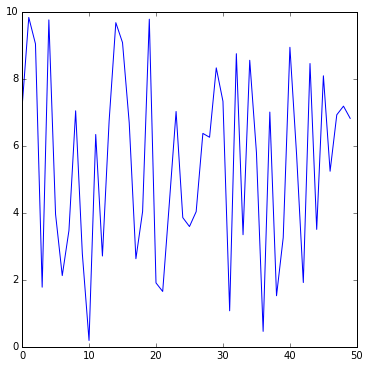

In [7]:
kwargs = {
    'npts': 50
}
html = lyzer.call_submit_function('graph_it', **kwargs);
with file('test.html', 'w') as fp:
    fp.write(html)

# Details on classes used

### InputElement and InputElementCollection

In [8]:
from ut.wserv.dashboard.analyzer import InputElement, InputElementCollection

In [9]:
element_1 = InputElement(name='my_element', type='number', display="Enter Number")

A InputElement is a dict (but it forces you to have a name and type keys. If the display key isn't given, it is set to the name.

In [10]:
print element_1['name']
print element_1['display']

my_element
Enter Number


A InputElementCollection is what it says it is: More precisely, it's a collections.OrderedDict collection indexed by the name of the list of InputElements we pass in

In [11]:
element_1 = dict(name='my_element', type='number', display="Enter Number: ", value=2)
element_2 = dict(name='my_other_element', type='text', value='some text')  # note there's no display here
element_3 = dict(name='do_something', type='submit', display="Do something: ", value="GO!")
input_element_collection = InputElementCollection([element_1, element_2, element_3])

In [12]:
print input_element_collection.keys()
print [v['display'] for k, v in input_element_collection.iteritems()]

['my_element', 'my_other_element', 'do_something']
['Enter Number: ', 'my_other_element', 'Do something: ']


In [13]:
input_element_collection['do_something']

{'display': 'Do something: ',
 'name': 'do_something',
 'type': 'submit',
 'value': 'GO!'}

In [14]:
from IPython.display import HTML
HTML(input_element_collection.to_html())

### Analyzer

In [15]:
from ut.wserv.dashboard.analyzer import Analyzer

In [16]:
element_1 = dict(name='my_element', type='number', display="Enter Number: ", value=2)
element_2 = dict(name='my_other_element', type='text', value='some text')  # note there's no display here
element_3 = dict(name='do_something', type='submit', display="Do something: ", value="GO!")
lyzer = Analyzer([element_1, element_2, element_3])

In [17]:
lyzer.__dict__.keys()

['input_element_collection', 'input', 'submit_methods']

In [18]:
print(lyzer.input['my_element'])
print(lyzer.input['my_other_element'])

2
some text


#### You can get the html of the form

In [19]:
print(lyzer.to_html())

<form>
Enter Number: <input type="number" name="my_element" value="2">
<br>
my_other_element<input type="text" name="my_other_element" value="some text">
<br>
Do something: <input type="submit" name="do_something" value="GO!">
<br>
</form>



In [20]:
from IPython.display import HTML
HTML(lyzer.to_html())